# ETL (Extraction Transform Load) y EDA (Analitics Exploration Data )

## ** **ANALISIS DE ARCHIVO BUSINESS DE LA PLATAFORMA YELP** **
Para comenzar a analizar, primero se hizo el proceso de ETL, ya que el archivo estaba en formato "pickle", y se transformo a "csv", ademas se utilizo la libreria "gdown", para descargar desde el drive, a colab. por el tema de recursos.

In [3]:
!pip install --upgrade gdown
import gdown

# ID de la carpeta de Google Drive
id = "1jJxkUUZ9JZO2PYJ5o5nbhWrr5uzQOfJB"

# Descargar todo el contenido de la carpeta
gdown.download_folder(f"https://drive.google.com/drive/folders/{id}", quiet=False)

ModuleNotFoundError: No module named 'gdown'

In [ ]:
!ls /content/Proyecto_final_Henry/dfbus_csv.csv

/content/Proyecto_final_Henry/dfbus_csv.csv


Se utilizaron metodos y funciones para su analisis como "info()", "dtypes()", "columns", "head()", etc.
Y tambien el uso de las librerias de PYTHON, (numpy, pandas, ast, matplotlib, datetime, etc.).


In [21]:
import numpy as np
import pandas as pd
import ast
import warnings
import datetime
import matplotlib.pyplot as plt

# Analisis del archivo dfbus_csv.csv
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
df_bus=pd.read_csv("../PROYFINAL1/prueba1.csv")
df_bus.head()


C:\Users\Esteban\AppData\Local\Temp\ipykernel_9332\1491784893.py:12: DtypeWarning: Columns (14,15,16,17,18,19,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_bus=pd.read_csv("../PROYFINAL1/prueba1.csv")


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,business_id.1,name.1,address.1,city.1,state.1,postal_code.1,latitude.1,longitude.1,stars.1,review_count.1,is_open.1,attributes.1,categories.1,hours.1
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Mailbox Centers, Printing Services","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', 'Wednesday': '8:0-18:30', 'Thursday': '8:0-18:30', 'Friday': '8:0-18:30', 'Saturday': '8:0-14:0'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '2', 'CoatCheck': 'False', 'RestaurantsTakeOut': 'False', 'RestaurantsDelivery': 'False', 'Caters': 'False', 'WiFi': ""u'no'"", 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'WheelchairAccessible': 'True', 'HappyHour': 'False', 'OutdoorSeating': 'False', 'HasTV': 'False', 'RestaurantsReservations': 'False', 'DogsAllowed': 'False', 'ByAppointmentOnly': 'False'}","Department Stores, Shopping, Fashion, Home & Garden, Electronics, Furniture Stores","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', 'Wednesday': '8:0-22:0', 'Thursday': '8:0-22:0', 'Friday': '8:0-23:0', 'Saturday': '8:0-23:0', 'Sunday': '8:0-22:0'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeating': 'False', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': ""{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}"", 'BikeParking': 'True', 'RestaurantsPriceRange2': '1', 'RestaurantsTakeOut': 'True', 'ByAppointmentOnly': 'False', 'WiFi': ""u'free'"", 'Alcohol': ""u'none'"", 'Caters': 'True'}","Restaurants, Food, Bubble Tea, Coffee & Tea, Bakeries","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', 'Wednesday': '7:0-20:0', 'Thursday': '7:0-20:0', 'Friday': '7:0-21:0', 'Saturday': '7:0-21:0', 'Sunday': '7:0-21:0'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'WheelchairAccessible': 'True', 'RestaurantsTakeOut': 'True', 'BusinessParking': ""{'garage': None, 'street': None, 'validated': None, 'lot': True, 'valet': False}"", 'BikeParking': 'True', 'GoodForKids': 'True', 'Caters': 'False'}","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-22:0', 'Friday': '12:0-22:0', 'Saturday': '12:0-22:0', 'Sunday': '12:0-18:0'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   business_id     150346 non-null  object 
 1   name            150346 non-null  object 
 2   address         145219 non-null  object 
 3   city            150346 non-null  object 
 4   state           150343 non-null  object 
 5   postal_code     150273 non-null  object 
 6   latitude        150346 non-null  float64
 7   longitude       150346 non-null  float64
 8   stars           150346 non-null  float64
 9   review_count    150346 non-null  int64  
 10  is_open         150346 non-null  int64  
 11  attributes      136602 non-null  object 
 12  categories      150243 non-null  object 
 13  hours           127123 non-null  object 
 14  business_id.1   5 non-null       object 
 15  name.1          5 non-null       object 
 16  address.1       5 non-null       object 
 17  city.1    

In [23]:
df_bus.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'business_id.1', 'name.1',
       'address.1', 'city.1', 'state.1', 'postal_code.1', 'latitude.1',
       'longitude.1', 'stars.1', 'review_count.1', 'is_open.1', 'attributes.1',
       'categories.1', 'hours.1'],
      dtype='object')

In [24]:
df_bus.columns.tolist  # Mostrar las columnas en una lista
# Eliminar la columna "Unnamed: 0" y todas las columnas que se encuentran repetidas, como "postal_code.1, latitude.1, etc".
df_bus = df_bus.drop(columns=['business_id.1', 'name.1',
       'address.1', 'city.1', 'state.1', 'postal_code.1', 'latitude.1',
       'longitude.1', 'stars.1', 'review_count.1', 'is_open.1', 'attributes.1',
       'categories.1', 'hours.1'])  # Eliminar la columna "Unnamed: 0" y "postal_code_int"
print(df_bus.columns)
df_bus.info()

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       145219 non-null  object 
 3   city          150346 non-null  object 
 4   state         150343 non-null  object 
 5   postal_code   150273 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         12

Vamos a analizar los elementos que son ceros de las columnas, y luego ver si la columna que puede ser un indice "business_id", contiene duplicados.

In [25]:
df_bus.isnull().sum()

business_id         0
name                0
address          5127
city                0
state               3
postal_code        73
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [26]:
df_bus.duplicated('business_id').sum()
df_newbuss=df_bus

In [31]:
df_fl = df_newbuss.loc[df_newbuss['state'] == 'FL']
df_fl.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
10,UJsufbvfyfONHeWdvAHKjA,Marshalls,21705 Village Lakes Sc Dr,Land O' Lakes,FL,34639,28.190459,-82.457380,3.5,6,1,"{'RestaurantsPriceRange2': '2', 'BikeParking': True, 'BusinessAcceptsCreditCards': True, 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}'}","Department Stores, Shopping, Fashion","{'Monday': '9:30-21:30', 'Tuesday': '9:30-21:30', 'Wednesday': '9:30-21:30', 'Thursday': '9:30-21:30', 'Friday': '9:30-21:30', 'Saturday': '9:30-21:30', 'Sunday': '10:0-20:0'}"
13,jaxMSoInw8Poo3XeMJt8lQ,Adams Dental,15 N Missouri Ave,Clearwater,FL,33755,27.966235,-82.787412,5.0,10,1,{'ByAppointmentOnly': True},"General Dentistry, Dentists, Health & Medical, Cosmetic Dentists","{'Monday': '7:30-15:30', 'Tuesday': '7:30-15:30', 'Wednesday': '7:30-15:30', 'Thursday': '7:30-15:30'}"
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,"{'OutdoorSeating': False, 'RestaurantsGoodForGroups': False, 'WiFi': 'u'no'', 'RestaurantsPriceRange2': '1', 'RestaurantsDelivery': True, 'RestaurantsAttire': 'u'casual'', 'BusinessAcceptsCreditCards': True, 'RestaurantsTakeOut': True, 'Caters': True, 'NoiseLevel': 'u'average'', 'Ambience': '{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': True}', 'GoodForKids': True, 'BusinessAcceptsBitcoin': False, 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'BikeParking': True, 'RestaurantsTableService': False, 'Alcohol': 'u'none'', 'RestaurantsReservations': False, 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': False, 'breakfast': False}', 'HasTV': True, 'WheelchairAccessible': True}","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0', 'Wednesday': '10:0-20:0', 'Thursday': '10:0-20:0', 'Friday': '10:0-20:0', 'Saturday': '10:0-20:0'}"
16,rBmpy_Y1UbBx8ggHlyb7hA,Arizona Truck Outfitters,625 N Stone Ave,Tucson,FL,85705,32.229872,-110.972342,4.5,10,1,"{'DriveThru': False, 'BusinessAcceptsCreditCards': True, 'WiFi': 'u'free'', 'ByAppointmentOnly': False}","Automotive, Auto Parts & Supplies, Auto Customization","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', 'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:0', 'Friday': '8:0-17:0', 'Saturday': '8:0-14:0', 'Sunday': '0:0-0:0'}"
17,M0XSSHqrASOnhgbWDJIpQA,Herb Import Co,712 Adams St,New Orleans,FL,70118,29.941468,-90.129953,4.0,5,1,"{'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'BusinessAcceptsCreditCards': True, 'RestaurantsPriceRange2': '2', 'BikeParking': True}","Vape Shops, Tobacco Shops, Personal Shopping, Vitamins & Supplements, Shopping","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0', 'Wednesday': '10:0-19:0', 'Thursday': '10:0-19:0', 'Friday': '10:0-19:0', 'Saturday': '10:0-19:0', 'Sunday': '10:0-19:0'}"


In [32]:
#Vamos a ver cuantos registros son los que estan en el ESTADO de FLORIDA
df_fl.shape

(26329, 14)

Veo que el indice principal no tiene duplicados, por ende puede ser una clave primaria y tomarla como "PRIMARY KEY" de esta entidad.

Cuando se analizo a simple vista la columna "attributes", se observo que habia distintas irregularidades que no se podia trabajar, debido a que habia signos de puntuacion que no me dejaba y ademas tambien los "value" eran del tipo "string" y no "bool", asi que eso se va a cambiar, tambien se observo que este atributo contiene un diccionario el cual se podria desanidar para su estudio, en forma individual.

In [37]:
df_prueba=df_fl
# Función para convertir los valores a diccionarios, evitando datos del tipo NaN
def safe_literal_eval(val):
    try:
        if pd.notna(val):
            return ast.literal_eval(val)
        return val
    except (ValueError, SyntaxError):
        return val  # Si ocurre error, devuelve el valor original
# Se lo aplico a "attributes"
df_prueba['attributes'] = df_prueba['attributes'].apply(safe_literal_eval)

# Función para convertir strings 'True'/'False' a booleanos en un diccionario
def convert_strings_to_bool(d):
    if isinstance(d, dict):  # Veo si es un diccionario
        for key, value in d.items():
            if value == 'True':
                d[key] = True
            elif value == 'False':
                d[key] = False
    return d
df_prueba['attributes'] = df_prueba['attributes'].apply(convert_strings_to_bool)
# Verificar los cambios
df_prueba['attributes'].head()

C:\Users\Esteban\AppData\Local\Temp\ipykernel_9332\4276305248.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prueba['attributes'] = df_prueba['attributes'].apply(safe_literal_eval)
C:\Users\Esteban\AppData\Local\Temp\ipykernel_9332\4276305248.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prueba['attributes'] = df_prueba['attributes'].apply(convert_strings_to_bool)


10                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 {'RestaurantsPriceRange2': '2', 'BikeParking': True, 'BusinessAcceptsCreditCards': True, 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}'}
13                                                                                               

In [38]:
# Chequeo cuantos, diccionarios vacios y cuantos NaN hay en la columna "attributes"
empty_dicts = df_prueba['attributes'].apply(lambda x: isinstance(x, dict) and len(x) == 0).sum()
nan_values = df_prueba['attributes'].isna().sum()
print(f"Diccionarios vacíos: {empty_dicts}, NaN: {nan_values}")
new_dfbuss=df_prueba
new_dfbuss.head()

Diccionarios vacíos: 0, NaN: 2446


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
10,UJsufbvfyfONHeWdvAHKjA,Marshalls,21705 Village Lakes Sc Dr,Land O' Lakes,FL,34639,28.190459,-82.457380,3.5,6,1,"{'RestaurantsPriceRange2': '2', 'BikeParking': True, 'BusinessAcceptsCreditCards': True, 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}'}","Department Stores, Shopping, Fashion","{'Monday': '9:30-21:30', 'Tuesday': '9:30-21:30', 'Wednesday': '9:30-21:30', 'Thursday': '9:30-21:30', 'Friday': '9:30-21:30', 'Saturday': '9:30-21:30', 'Sunday': '10:0-20:0'}"
13,jaxMSoInw8Poo3XeMJt8lQ,Adams Dental,15 N Missouri Ave,Clearwater,FL,33755,27.966235,-82.787412,5.0,10,1,{'ByAppointmentOnly': True},"General Dentistry, Dentists, Health & Medical, Cosmetic Dentists","{'Monday': '7:30-15:30', 'Tuesday': '7:30-15:30', 'Wednesday': '7:30-15:30', 'Thursday': '7:30-15:30'}"
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,"{'OutdoorSeating': False, 'RestaurantsGoodForGroups': False, 'WiFi': 'u'no'', 'RestaurantsPriceRange2': '1', 'RestaurantsDelivery': True, 'RestaurantsAttire': 'u'casual'', 'BusinessAcceptsCreditCards': True, 'RestaurantsTakeOut': True, 'Caters': True, 'NoiseLevel': 'u'average'', 'Ambience': '{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': True}', 'GoodForKids': True, 'BusinessAcceptsBitcoin': False, 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'BikeParking': True, 'RestaurantsTableService': False, 'Alcohol': 'u'none'', 'RestaurantsReservations': False, 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': False, 'breakfast': False}', 'HasTV': True, 'WheelchairAccessible': True}","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0', 'Wednesday': '10:0-20:0', 'Thursday': '10:0-20:0', 'Friday': '10:0-20:0', 'Saturday': '10:0-20:0'}"
16,rBmpy_Y1UbBx8ggHlyb7hA,Arizona Truck Outfitters,625 N Stone Ave,Tucson,FL,85705,32.229872,-110.972342,4.5,10,1,"{'DriveThru': False, 'BusinessAcceptsCreditCards': True, 'WiFi': 'u'free'', 'ByAppointmentOnly': False}","Automotive, Auto Parts & Supplies, Auto Customization","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', 'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:0', 'Friday': '8:0-17:0', 'Saturday': '8:0-14:0', 'Sunday': '0:0-0:0'}"
17,M0XSSHqrASOnhgbWDJIpQA,Herb Import Co,712 Adams St,New Orleans,FL,70118,29.941468,-90.129953,4.0,5,1,"{'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'BusinessAcceptsCreditCards': True, 'RestaurantsPriceRange2': '2', 'BikeParking': True}","Vape Shops, Tobacco Shops, Personal Shopping, Vitamins & Supplements, Shopping","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0', 'Wednesday': '10:0-19:0', 'Thursday': '10:0-19:0', 'Friday': '10:0-19:0', 'Saturday': '10:0-19:0', 'Sunday': '10:0-19:0'}"


In [47]:
new_dfbuss.shape

(26329, 14)

Para eso me creo un diccionario por defecto, con valores "False", para cada "key". Donde esta contiene los datos relacionados a los estudiados que serian los "restaurant".

In [48]:
# Defino un diccionario por defecto, con los datos que necesitamos
default_dict = {'BikeParking': False, 'OutdoorSeating': False, 'HasTV': False, 'RestaurantsDelivery': False,'RestaurantsTakeOut': False,'BusinessAcceptsCreditCards': False,'RestaurantsGoodForGroups': False,'Caters': False,'BusinessAcceptsBitcoin': False, 'RestaurantsTableService': False,'DriveThru': True, 'ByAppointmentOnly': False, 'WheelchairAccessible':False}
df_prueba['attributes'] = df_prueba['attributes'].apply(lambda x: default_dict if (x == {} or pd.isna(x)) else x)
df_newbuss=df_prueba
# Veo los ultimos 5 elementos para ver si se ha reemplazado correctamente
df_prueba.head()


C:\Users\Esteban\AppData\Local\Temp\ipykernel_9332\3136578862.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prueba['attributes'] = df_prueba['attributes'].apply(lambda x: default_dict if (x == {} or pd.isna(x)) else x)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
10,UJsufbvfyfONHeWdvAHKjA,Marshalls,21705 Village Lakes Sc Dr,Land O' Lakes,FL,34639,28.190459,-82.457380,3.5,6,1,"{'RestaurantsPriceRange2': '2', 'BikeParking': True, 'BusinessAcceptsCreditCards': True, 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}'}","Department Stores, Shopping, Fashion","{'Monday': '9:30-21:30', 'Tuesday': '9:30-21:30', 'Wednesday': '9:30-21:30', 'Thursday': '9:30-21:30', 'Friday': '9:30-21:30', 'Saturday': '9:30-21:30', 'Sunday': '10:0-20:0'}"
13,jaxMSoInw8Poo3XeMJt8lQ,Adams Dental,15 N Missouri Ave,Clearwater,FL,33755,27.966235,-82.787412,5.0,10,1,{'ByAppointmentOnly': True},"General Dentistry, Dentists, Health & Medical, Cosmetic Dentists","{'Monday': '7:30-15:30', 'Tuesday': '7:30-15:30', 'Wednesday': '7:30-15:30', 'Thursday': '7:30-15:30'}"
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,"{'OutdoorSeating': False, 'RestaurantsGoodForGroups': False, 'WiFi': 'u'no'', 'RestaurantsPriceRange2': '1', 'RestaurantsDelivery': True, 'RestaurantsAttire': 'u'casual'', 'BusinessAcceptsCreditCards': True, 'RestaurantsTakeOut': True, 'Caters': True, 'NoiseLevel': 'u'average'', 'Ambience': '{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': True}', 'GoodForKids': True, 'BusinessAcceptsBitcoin': False, 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'BikeParking': True, 'RestaurantsTableService': False, 'Alcohol': 'u'none'', 'RestaurantsReservations': False, 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': False, 'breakfast': False}', 'HasTV': True, 'WheelchairAccessible': True}","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0', 'Wednesday': '10:0-20:0', 'Thursday': '10:0-20:0', 'Friday': '10:0-20:0', 'Saturday': '10:0-20:0'}"
16,rBmpy_Y1UbBx8ggHlyb7hA,Arizona Truck Outfitters,625 N Stone Ave,Tucson,FL,85705,32.229872,-110.972342,4.5,10,1,"{'DriveThru': False, 'BusinessAcceptsCreditCards': True, 'WiFi': 'u'free'', 'ByAppointmentOnly': False}","Automotive, Auto Parts & Supplies, Auto Customization","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', 'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:0', 'Friday': '8:0-17:0', 'Saturday': '8:0-14:0', 'Sunday': '0:0-0:0'}"
17,M0XSSHqrASOnhgbWDJIpQA,Herb Import Co,712 Adams St,New Orleans,FL,70118,29.941468,-90.129953,4.0,5,1,"{'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'BusinessAcceptsCreditCards': True, 'RestaurantsPriceRange2': '2', 'BikeParking': True}","Vape Shops, Tobacco Shops, Personal Shopping, Vitamins & Supplements, Shopping","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0', 'Wednesday': '10:0-19:0', 'Thursday': '10:0-19:0', 'Friday': '10:0-19:0', 'Saturday': '10:0-19:0', 'Sunday': '10:0-19:0'}"


In [49]:
# Corroboro que me haya cambiado todos los datos, por el diccionario por defecto
empty_dicts = new_dfbuss['attributes'].apply(lambda x: isinstance(x, dict) and len(x) == 0).sum()
nan_values = new_dfbuss['attributes'].isna().sum()

print(f"Diccionarios vacíos: {empty_dicts}, NaN: {nan_values}")

Diccionarios vacíos: 0, NaN: 0


Vamos a aplanar el diccionario este, donde las clave seran las nuevas columnas y los valores las filas.
Para poder analizar bien, cada uno de sus valores y si me hacen representabilidad en la toma de desiciones.

In [50]:
# Aplano el diccionario de attributes
attributes_flat = pd.json_normalize(new_dfbuss['attributes'])
df_flattened = pd.concat([new_dfbuss.drop('attributes', axis=1), attributes_flat], axis=1)
df_flattened.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,hours,RestaurantsPriceRange2,BikeParking,BusinessAcceptsCreditCards,BusinessParking,ByAppointmentOnly,OutdoorSeating,RestaurantsGoodForGroups,WiFi,RestaurantsDelivery,RestaurantsAttire,RestaurantsTakeOut,Caters,NoiseLevel,Ambience,GoodForKids,BusinessAcceptsBitcoin,RestaurantsTableService,Alcohol,RestaurantsReservations,GoodForMeal,HasTV,WheelchairAccessible,DriveThru,DogsAllowed,HappyHour,CoatCheck,Music,Smoking,GoodForDancing,BestNights,AcceptsInsurance,Corkage,BYOBCorkage,HairSpecializesIn,BYOB,Open24Hours,AgesAllowed,DietaryRestrictions,RestaurantsCounterService
10,UJsufbvfyfONHeWdvAHKjA,Marshalls,21705 Village Lakes Sc Dr,Land O' Lakes,FL,34639,28.190459,-82.457380,3.5,6.0,1.0,"Department Stores, Shopping, Fashion","{'Monday': '9:30-21:30', 'Tuesday': '9:30-21:30', 'Wednesday': '9:30-21:30', 'Thursday': '9:30-21:30', 'Friday': '9:30-21:30', 'Saturday': '9:30-21:30', 'Sunday': '10:0-20:0'}",NaN,False,False,NaN,False,False,False,NaN,False,NaN,False,False,NaN,NaN,NaN,False,False,NaN,NaN,NaN,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,jaxMSoInw8Poo3XeMJt8lQ,Adams Dental,15 N Missouri Ave,Clearwater,FL,33755,27.966235,-82.787412,5.0,10.0,1.0,"General Dentistry, Dentists, Health & Medical, Cosmetic Dentists","{'Monday': '7:30-15:30', 'Tuesday': '7:30-15:30', 'Wednesday': '7:30-15:30', 'Thursday': '7:30-15:30'}",NaN,NaN,True,NaN,NaN,NaN,NaN,u'free',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100.0,0.0,"Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0', 'Wednesday': '10:0-20:0', 'Thursday': '10:0-20:0', 'Friday': '10:0-20:0', 'Saturday': '10:0-20:0'}",1,True,False,"{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,rBmpy_Y1UbBx8ggHlyb7hA,Arizona Truck Outfitters,625 N Stone Ave,Tucson,FL,85705,32.229872,-110.972342,4.5,10.0,1.0,"Automotive, Auto Parts & Supplies, Auto Customization","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', 'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:0', 'Friday': '8:0-17:0', 'Saturday': '8:0-14:0', 'Sunday': '0:0-0:0'}",NaN,False,False,NaN,False,False,False,NaN,False,NaN,False,False,NaN,NaN,NaN,False,False,NaN,NaN,NaN,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,M0XSSHqrASOnhgbWDJIpQA,Herb Import Co,712 Adams St,New Orleans,FL,70118,29.941468,-90.129953,4.0,5.0,1.0,"Vape Shops, Tobacco Shops, Personal Shopping, Vitamins & Supplements, Shopping","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0', 'Wednesday': '10:0-19:0', 'Thursday': '10:0-19:0', 'Friday': '10:0-19:0', 'Saturday': '10:0-19:0', 'Sunday': '10:0-19:0'}",3,True,True,"{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}",NaN,True,True,NaN,False,u'formal',False,NaN,NaN,"{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}",False,NaN,NaN,'full_bar',True,"{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'brunch': False, 'breakfast': False}",False,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df_flattened.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48066 entries, 10 to 26328
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 26329 non-null  object 
 1   name                        26329 non-null  object 
 2   address                     25413 non-null  object 
 3   city                        26329 non-null  object 
 4   state                       26329 non-null  object 
 5   postal_code                 26321 non-null  object 
 6   latitude                    26329 non-null  float64
 7   longitude                   26329 non-null  float64
 8   stars                       26329 non-null  float64
 9   review_count                26329 non-null  float64
 10  is_open                     26329 non-null  float64
 11  categories                  26311 non-null  object 
 12  hours                       22221 non-null  object 
 13  RestaurantsPriceRange2      15003 n

In [51]:
columnas_a_analizar = ['BikeParking', 'OutdoorSeating', 'HasTV', 'RestaurantsDelivery','RestaurantsTakeOut','BusinessAcceptsCreditCards','RestaurantsGoodForGroups','BusinessAcceptsBitcoin', 'RestaurantsTableService','DriveThru', 'ByAppointmentOnly', 'WheelchairAccessible']  # Diccionario por defecto
df_seleccionado = df_flattened[columnas_a_analizar]
df_seleccionado.head()



,BikeParking,OutdoorSeating,HasTV,RestaurantsDelivery,RestaurantsTakeOut,BusinessAcceptsCreditCards,RestaurantsGoodForGroups,BusinessAcceptsBitcoin,RestaurantsTableService,DriveThru,ByAppointmentOnly,WheelchairAccessible
10,False,False,False,False,False,False,False,False,False,True,False,False
13,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
14,True,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False
16,False,False,False,False,False,False,False,False,False,True,False,False
17,True,True,False,False,False,True,True,NaN,NaN,NaN,NaN,NaN


In [52]:
df_seleccionado.shape

(48066, 12)

In [25]:
df_seleccionado.isnull().sum()

,0
BikeParking,63964
OutdoorSeating,87800
HasTV,91518
RestaurantsDelivery,80320
RestaurantsTakeOut,76745
BusinessAcceptsCreditCards,16837
RestaurantsGoodForGroups,92432
BusinessAcceptsBitcoin,119172
RestaurantsTableService,116620
DriveThru,128842


In [53]:
df_attr=df_seleccionado

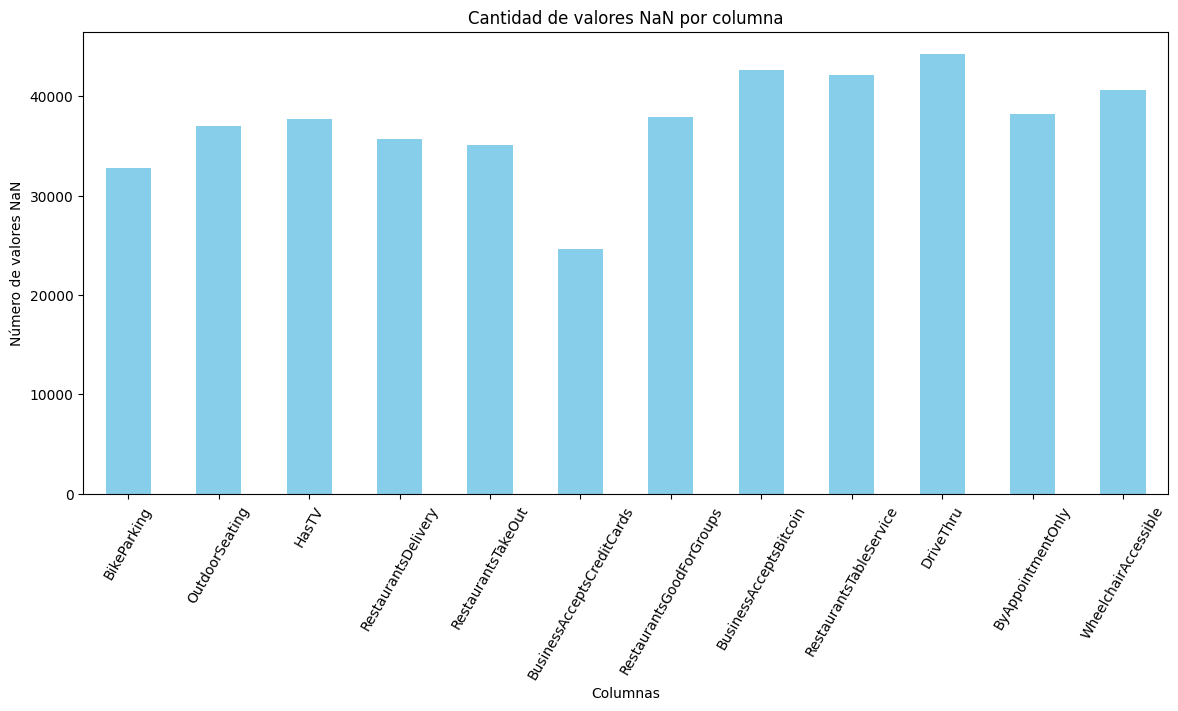

In [54]:
# Contar los valores NaN en las columnas seleccionadas
nan_count = df_attr.isna().sum()
# Crear el diagrama de barras para NaN


plt.figure(figsize=(14, 6))
nan_count.plot(kind='bar', color='skyblue')
plt.title('Cantidad de valores NaN por columna')
plt.xlabel('Columnas')
plt.ylabel('Número de valores NaN')
plt.xticks(rotation=60)
plt.show()

De acuerdo a esta grafica, podemos notar, que hay muchas columnas que tienen mas del 50% de valores nulos.
De todas estas columnas nos vamos a quedar con las 5 mejores, osea las que menos datos NaN tengan.

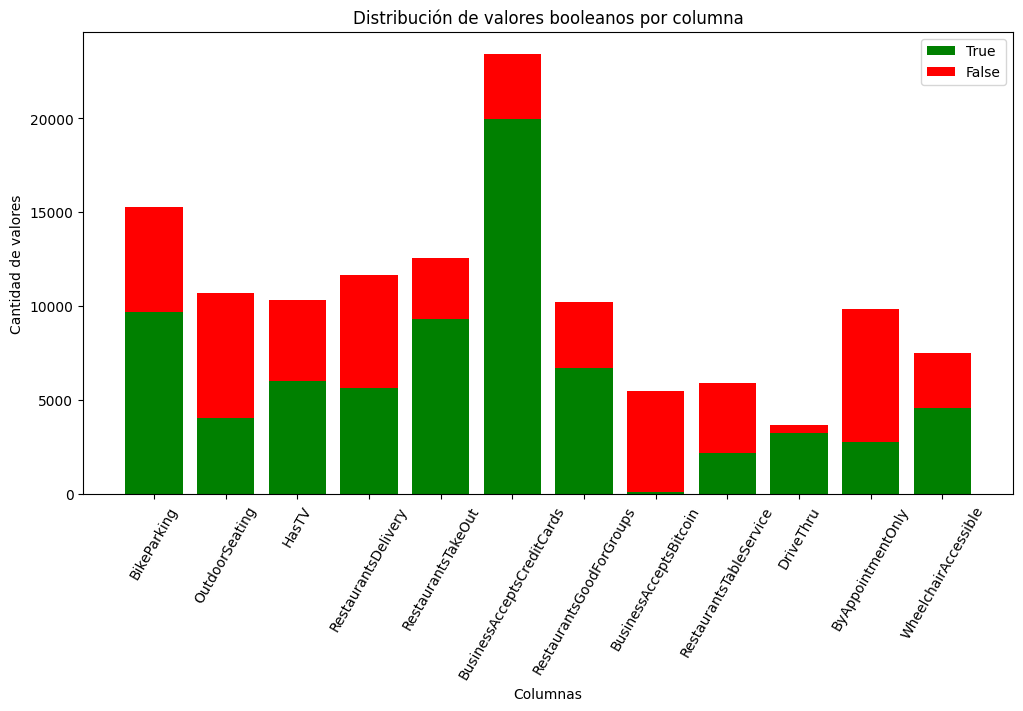

In [55]:
# Contar valores True y False por columna
true_counts = df_seleccionado.apply(lambda x: (x == True).sum())
false_counts = df_seleccionado.apply(lambda x: (x == False).sum())

# Crear el diagrama de barras apiladas
plt.figure(figsize=(12, 6))
plt.bar(df_seleccionado.columns, true_counts, label='True', color='green')
plt.bar(df_seleccionado.columns, false_counts, bottom=true_counts, label='False', color='red')
plt.title('Distribución de valores booleanos por columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores')
plt.xticks(rotation=60)
plt.legend()
plt.show()



De acuedo a los graficos de diagrama de barra, y el de acumulada, se podria analizar que son pocas los attributos que pueden tener influencia para el estudio de las mejoras en ralacion al negocio.

In [56]:
nan_counts = df_attr.isna().sum()
columns_least_nan = nan_counts.sort_values().index[:5]
# Seleccionar las 5 columnas que tienen menos valores NaN
df_selected = df_attr[columns_least_nan]
# Agregar estas 5 columnas seleccionadas al DataFrame original y crear un nuevo DataFrame con esas columnas incluidas
df_combined = pd.concat([df_prueba, df_selected], axis=1)
# Verificar el DataFrame resultante con las 5 columnas agregadas
df_combined.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,BusinessAcceptsCreditCards,BikeParking,RestaurantsTakeOut,RestaurantsDelivery,OutdoorSeating
10,UJsufbvfyfONHeWdvAHKjA,Marshalls,21705 Village Lakes Sc Dr,Land O' Lakes,FL,34639,28.190459,-82.457380,3.5,6.0,1.0,"{'RestaurantsPriceRange2': '2', 'BikeParking': True, 'BusinessAcceptsCreditCards': True, 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}'}","Department Stores, Shopping, Fashion","{'Monday': '9:30-21:30', 'Tuesday': '9:30-21:30', 'Wednesday': '9:30-21:30', 'Thursday': '9:30-21:30', 'Friday': '9:30-21:30', 'Saturday': '9:30-21:30', 'Sunday': '10:0-20:0'}",False,False,False,False,False
13,jaxMSoInw8Poo3XeMJt8lQ,Adams Dental,15 N Missouri Ave,Clearwater,FL,33755,27.966235,-82.787412,5.0,10.0,1.0,{'ByAppointmentOnly': True},"General Dentistry, Dentists, Health & Medical, Cosmetic Dentists","{'Monday': '7:30-15:30', 'Tuesday': '7:30-15:30', 'Wednesday': '7:30-15:30', 'Thursday': '7:30-15:30'}",True,NaN,NaN,NaN,NaN
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100.0,0.0,"{'OutdoorSeating': False, 'RestaurantsGoodForGroups': False, 'WiFi': 'u'no'', 'RestaurantsPriceRange2': '1', 'RestaurantsDelivery': True, 'RestaurantsAttire': 'u'casual'', 'BusinessAcceptsCreditCards': True, 'RestaurantsTakeOut': True, 'Caters': True, 'NoiseLevel': 'u'average'', 'Ambience': '{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': True}', 'GoodForKids': True, 'BusinessAcceptsBitcoin': False, 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'BikeParking': True, 'RestaurantsTableService': False, 'Alcohol': 'u'none'', 'RestaurantsReservations': False, 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': False, 'breakfast': False}', 'HasTV': True, 'WheelchairAccessible': True}","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0', 'Wednesday': '10:0-20:0', 'Thursday': '10:0-20:0', 'Friday': '10:0-20:0', 'Saturday': '10:0-20:0'}",False,True,NaN,NaN,NaN
16,rBmpy_Y1UbBx8ggHlyb7hA,Arizona Truck Outfitters,625 N Stone Ave,Tucson,FL,85705,32.229872,-110.972342,4.5,10.0,1.0,"{'DriveThru': False, 'BusinessAcceptsCreditCards': True, 'WiFi': 'u'free'', 'ByAppointmentOnly': False}","Automotive, Auto Parts & Supplies, Auto Customization","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', 'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:0', 'Friday': '8:0-17:0', 'Saturday': '8:0-14:0', 'Sunday': '0:0-0:0'}",False,False,False,False,False
17,M0XSSHqrASOnhgbWDJIpQA,Herb Import Co,712 Adams St,New Orleans,FL,70118,29.941468,-90.129953,4.0,5.0,1.0,"{'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'BusinessAcceptsCreditCards': True, 'RestaurantsPriceRange2': '2', 'BikeParking': True}","Vape Shops, Tobacco Shops, Personal Shopping, Vitamins & Supplements, Shopping","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0', 'Wednesday': '10:0-19:0', 'Thursday': '10:0-19:0', 'Friday': '10:0-19:0', 'Saturday': '10:0-19:0', 'Sunday': '10:0-19:0'}",True,True,False,False,True


In [58]:
df_combined.shape

(48066, 19)

In [59]:
df_sinattr = df_combined.drop('attributes', axis=1)
df_sinattr.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,hours,BusinessAcceptsCreditCards,BikeParking,RestaurantsTakeOut,RestaurantsDelivery,OutdoorSeating
10,UJsufbvfyfONHeWdvAHKjA,Marshalls,21705 Village Lakes Sc Dr,Land O' Lakes,FL,34639,28.190459,-82.457380,3.5,6.0,1.0,"Department Stores, Shopping, Fashion","{'Monday': '9:30-21:30', 'Tuesday': '9:30-21:30', 'Wednesday': '9:30-21:30', 'Thursday': '9:30-21:30', 'Friday': '9:30-21:30', 'Saturday': '9:30-21:30', 'Sunday': '10:0-20:0'}",False,False,False,False,False
13,jaxMSoInw8Poo3XeMJt8lQ,Adams Dental,15 N Missouri Ave,Clearwater,FL,33755,27.966235,-82.787412,5.0,10.0,1.0,"General Dentistry, Dentists, Health & Medical, Cosmetic Dentists","{'Monday': '7:30-15:30', 'Tuesday': '7:30-15:30', 'Wednesday': '7:30-15:30', 'Thursday': '7:30-15:30'}",True,NaN,NaN,NaN,NaN
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100.0,0.0,"Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0', 'Wednesday': '10:0-20:0', 'Thursday': '10:0-20:0', 'Friday': '10:0-20:0', 'Saturday': '10:0-20:0'}",False,True,NaN,NaN,NaN
16,rBmpy_Y1UbBx8ggHlyb7hA,Arizona Truck Outfitters,625 N Stone Ave,Tucson,FL,85705,32.229872,-110.972342,4.5,10.0,1.0,"Automotive, Auto Parts & Supplies, Auto Customization","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', 'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:0', 'Friday': '8:0-17:0', 'Saturday': '8:0-14:0', 'Sunday': '0:0-0:0'}",False,False,False,False,False
17,M0XSSHqrASOnhgbWDJIpQA,Herb Import Co,712 Adams St,New Orleans,FL,70118,29.941468,-90.129953,4.0,5.0,1.0,"Vape Shops, Tobacco Shops, Personal Shopping, Vitamins & Supplements, Shopping","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0', 'Wednesday': '10:0-19:0', 'Thursday': '10:0-19:0', 'Friday': '10:0-19:0', 'Saturday': '10:0-19:0', 'Sunday': '10:0-19:0'}",True,True,False,False,True


In [60]:
df_sinattr.shape

(48066, 18)

In [61]:
# Visualizar la columna 'categories'
print(df_sinattr['categories'].head())

10                                              Department Stores, Shopping, Fashion
13                  General Dentistry, Dentists, Health & Medical, Cosmetic Dentists
14                                       Food, Delis, Italian, Bakeries, Restaurants
16                             Automotive, Auto Parts & Supplies, Auto Customization
17    Vape Shops, Tobacco Shops, Personal Shopping, Vitamins & Supplements, Shopping
Name: categories, dtype: object


In [62]:
df_sinattr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48066 entries, 10 to 26328
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 26329 non-null  object 
 1   name                        26329 non-null  object 
 2   address                     25413 non-null  object 
 3   city                        26329 non-null  object 
 4   state                       26329 non-null  object 
 5   postal_code                 26321 non-null  object 
 6   latitude                    26329 non-null  float64
 7   longitude                   26329 non-null  float64
 8   stars                       26329 non-null  float64
 9   review_count                26329 non-null  float64
 10  is_open                     26329 non-null  float64
 11  categories                  26311 non-null  object 
 12  hours                       22221 non-null  object 
 13  BusinessAcceptsCreditCards  23429 n

Al igual que se hizo con la columna "attributes", vamos a hacer con lo la columna "categories", esta no es un diccionario sino una lista de categorias que abarca el negocio.
Esta tambien se va a analizar, para saber que tipos de categorias hay mas de cada tipo de comidas.

In [63]:
df_sinattr['categories'].head()
df_buscat=df_sinattr

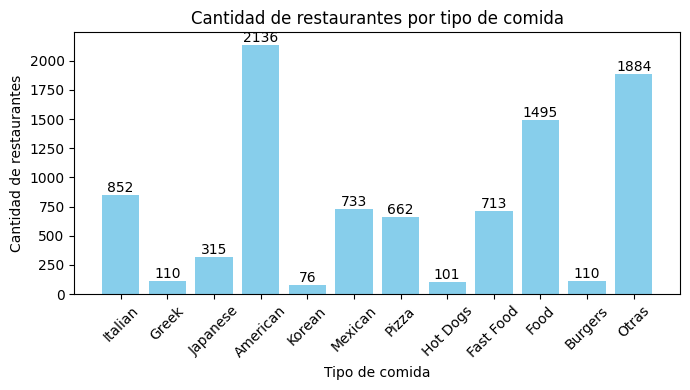

In [64]:
# Filtrar las filas que contienen la palabra "Restaurant" en la columna 'categories'
df_resta = df_buscat[df_buscat['categories'].str.contains('Restaurant', case=False, na=False)]
total=len(df_resta['categories'])
# Definir los tipos de comidas que queremos analizar
tipos_comida = ['Italian', 'Greek', 'Japanese', 'American', 'Korean', 'Mexican','Pizza','Hot Dogs','Fast Food','Food','Burgers']
# Inicializar un diccionario para contar la cantidad de restaurantes de cada tipo
conteo_comidas = {comida: 0 for comida in tipos_comida}
conteo_comidas['Otras'] = 0  # Para contar el resto de tipos de comida

# Contar la cantidad de restaurantes de cada tipo de comida
for categories in df_resta['categories']:
    encontrado = False
    for comida in tipos_comida:
        if comida in categories:
            conteo_comidas[comida] += 1
            encontrado = True
            break
    if not encontrado:
        conteo_comidas['Otras'] += 1

# Crear la figura y la barra
plt.figure(figsize=(7, 4))
bars = plt.bar(conteo_comidas.keys(), conteo_comidas.values(), color='skyblue')

# Etiquetas para cada barra
for bar in bars:
    height = bar.get_height()  # Obtener la altura (valor) de la barra
    plt.text(bar.get_x() + bar.get_width() / 2, height,   # Posicionar el texto
             f'{int(height)}',                           # Texto que se mostrará
             ha='center', va='bottom')                   # Centrar y ajustar verticalmente

# Configuraciones del gráfico
plt.xlabel('Tipo de comida')
plt.ylabel('Cantidad de restaurantes')
plt.title('Cantidad de restaurantes por tipo de comida')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

En esta grafica se vee que la categoria que mas restaurantes tiene es la de comidas americanas con u total de 2136 cant de restaurantes.
Tambien se puede analizar que el consumo de comidas chatarras como (pizzas, hot dogs, comidas rapidas, hamburguesas, etc), tambien hay muchos lugares que ofrecen este tipo de comidas.
Y los resutarantes italianos como mexicanos tambien hay buena cantidad.
Pero la eleccion de nosotros gracia a los estudios realizados fue RESTAURANT AMERICANOS.

Como nuestro estudio fue elegir el estado de FLORIDA, entonces veremos y analizaremos cual de los estados, tiene mas registros.
Para luego poder hacer alguna comparacion en relacion a los datos estudiados.

In [71]:
df_resta.shape

(9187, 18)

Aca podemos ver que la cantidad de restaurantes en FLORIDA, son 9187, ahora vamos a ver cual es el estado con mayor cantidad de restaurantes, y ademas la ciudad.

In [81]:
# Ciudad que más se repite
ciudad_mas_frecuente = df_bus['city'].value_counts().idxmax()
ciudad_repeticiones = df_bus['city'].value_counts().max()

# Estado que más se repite
estado_mas_frecuente = df_bus['state'].value_counts().idxmax()
estado_repeticiones = df_bus['state'].value_counts().max()

# Mostrar los resultados
print(f"La ciudad que más se repite es: {ciudad_mas_frecuente} con {ciudad_repeticiones} ocurrencias.")
print(f"El estado que más se repite es: {estado_mas_frecuente} con {estado_repeticiones} ocurrencias.")

La ciudad que más se repite es: Philadelphia con 14569 ocurrencias.
El estado que más se repite es: PA con 34039 ocurrencias.


In [82]:
df_prueba.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
10,UJsufbvfyfONHeWdvAHKjA,Marshalls,21705 Village Lakes Sc Dr,Land O' Lakes,FL,34639,28.190459,-82.457380,3.5,6,1,"{'RestaurantsPriceRange2': '2', 'BikeParking': True, 'BusinessAcceptsCreditCards': True, 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}'}","Department Stores, Shopping, Fashion","{'Monday': '9:30-21:30', 'Tuesday': '9:30-21:30', 'Wednesday': '9:30-21:30', 'Thursday': '9:30-21:30', 'Friday': '9:30-21:30', 'Saturday': '9:30-21:30', 'Sunday': '10:0-20:0'}"
13,jaxMSoInw8Poo3XeMJt8lQ,Adams Dental,15 N Missouri Ave,Clearwater,FL,33755,27.966235,-82.787412,5.0,10,1,{'ByAppointmentOnly': True},"General Dentistry, Dentists, Health & Medical, Cosmetic Dentists","{'Monday': '7:30-15:30', 'Tuesday': '7:30-15:30', 'Wednesday': '7:30-15:30', 'Thursday': '7:30-15:30'}"
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,"{'OutdoorSeating': False, 'RestaurantsGoodForGroups': False, 'WiFi': 'u'no'', 'RestaurantsPriceRange2': '1', 'RestaurantsDelivery': True, 'RestaurantsAttire': 'u'casual'', 'BusinessAcceptsCreditCards': True, 'RestaurantsTakeOut': True, 'Caters': True, 'NoiseLevel': 'u'average'', 'Ambience': '{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': True}', 'GoodForKids': True, 'BusinessAcceptsBitcoin': False, 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'BikeParking': True, 'RestaurantsTableService': False, 'Alcohol': 'u'none'', 'RestaurantsReservations': False, 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': False, 'breakfast': False}', 'HasTV': True, 'WheelchairAccessible': True}","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0', 'Wednesday': '10:0-20:0', 'Thursday': '10:0-20:0', 'Friday': '10:0-20:0', 'Saturday': '10:0-20:0'}"
16,rBmpy_Y1UbBx8ggHlyb7hA,Arizona Truck Outfitters,625 N Stone Ave,Tucson,FL,85705,32.229872,-110.972342,4.5,10,1,"{'DriveThru': False, 'BusinessAcceptsCreditCards': True, 'WiFi': 'u'free'', 'ByAppointmentOnly': False}","Automotive, Auto Parts & Supplies, Auto Customization","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', 'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:0', 'Friday': '8:0-17:0', 'Saturday': '8:0-14:0', 'Sunday': '0:0-0:0'}"
17,M0XSSHqrASOnhgbWDJIpQA,Herb Import Co,712 Adams St,New Orleans,FL,70118,29.941468,-90.129953,4.0,5,1,"{'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'BusinessAcceptsCreditCards': True, 'RestaurantsPriceRange2': '2', 'BikeParking': True}","Vape Shops, Tobacco Shops, Personal Shopping, Vitamins & Supplements, Shopping","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0', 'Wednesday': '10:0-19:0', 'Thursday': '10:0-19:0', 'Friday': '10:0-19:0', 'Saturday': '10:0-19:0', 'Sunday': '10:0-19:0'}"


In [83]:

df_busshs=df_resta
# Filtrar los registros donde el estado sea "FL" y la columna 'categories' contenga "Restaurant"
restaurantes_fl = df_busshs[(df_busshs['state'] == 'FL') & (df_busshs['categories'].str.contains('American', case=False, na=False))]
# Mostrar la cantidad de registros que cumplen con las condiciones
cantidad_restaurantes_fl = len(restaurantes_fl)
# Mostrar los primeros registros para verificar el filtro
print(f"Cantidad de restaurantes en FLORIDA, de TIPOS DE COMIDAS AMERICANAS: {cantidad_restaurantes_fl}")


Cantidad de restaurantes en FLORIDA, de TIPOS DE COMIDAS AMERICANAS: 2271


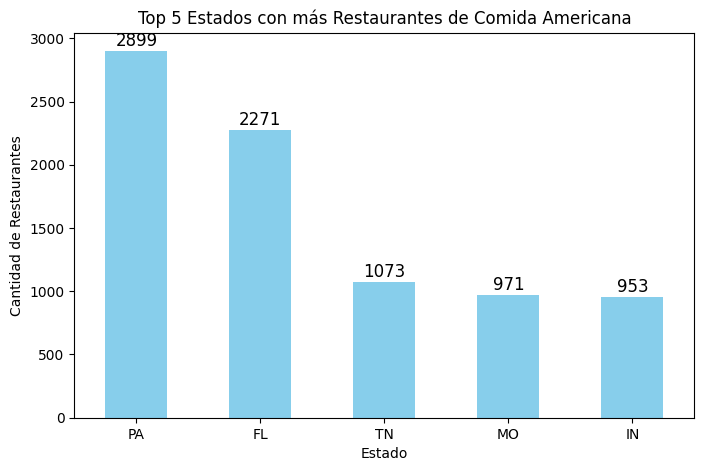

In [84]:
# Filtrar registros donde 'categories' contiene "Restaurant" y "American"
filtro_restaurantes_american = df_bus[df_bus['categories'].str.contains('Restaurant', case=False, na=False) &
                                  df_bus['categories'].str.contains('American', case=False, na=False)]
# Contar la cantidad de registros por estado
conteo_por_estado = filtro_restaurantes_american['state'].value_counts()
# Seleccionar los 5 estados con más registros
top_5_estados = conteo_por_estado.head(5)
# Crear el gráfico de barras
plt.figure(figsize=(8,5))
barras = top_5_estados.plot(kind='bar', color='skyblue')
# Añadir los valores a cada barra
for i, valor in enumerate(top_5_estados):
    plt.text(i, valor + 10, str(valor), ha='center', va='bottom', fontsize=12)
# Personalizar el gráfico
plt.title('Top 5 Estados con más Restaurantes de Comida Americana')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Restaurantes')
plt.xticks(rotation=0)
# Mostrar el gráfico
plt.show()

Aca se realiza el filtrado y la grafica, para demostrar, lo de la eleccion del estado de "FLORIDA - 2271", ya que es uno de los de mayor cantidad de registros tenemos. Despues del estado de PHILADELPIA, con un total de 2899, pero en el estdo de FLORIDA esta hoy en dia mejorando debido al deporte del FUTBOL por MESSI, ya que el se encuentra en el club de MIAMI.

In [85]:
df_busshs['hours'].tail()

150231                   {'Monday': '0:0-0:0', 'Tuesday': '9:0-21:0', 'Wednesday': '9:0-21:0', 'Thursday': '8:0-22:0', 'Friday': '8:0-22:0', 'Saturday': '9:0-22:0', 'Sunday': '9:0-21:0'}
150237              {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0', 'Wednesday': '11:0-22:0', 'Thursday': '11:0-3:0', 'Friday': '11:0-3:0', 'Saturday': '11:0-3:0', 'Sunday': '11:0-22:0'}
150249           {'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0', 'Wednesday': '11:0-23:0', 'Thursday': '11:0-23:0', 'Friday': '11:0-23:0', 'Saturday': '11:0-23:0', 'Sunday': '11:0-23:0'}
150283           {'Monday': '14:0-21:0', 'Tuesday': '14:0-21:0', 'Wednesday': '14:0-21:0', 'Thursday': '14:0-21:0', 'Friday': '14:0-21:0', 'Saturday': '13:0-21:0', 'Sunday': '13:0-21:0'}
150292    {'Monday': '11:30-23:0', 'Tuesday': '11:30-23:0', 'Wednesday': '11:30-23:0', 'Thursday': '11:30-23:0', 'Friday': '11:30-0:30', 'Saturday': '11:30-0:30', 'Sunday': '11:30-23:0'}
Name: hours, dtype: object

Con la columna de horas, se hizo un analisis similar a las columnas anteriores, ya que tambien tienen un formato de diccionario, pero tambien estan mal normalizados e inicializados.
es por eso como este dato hace referencia a la apertura y cierre del negocio, vamos a crear nuevas columnas de acuerdo a esos datos

C:\Users\Esteban\AppData\Local\Temp\ipykernel_9332\155702886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_busshs.replace({'0:0-0:0': np.nan}, inplace=True)


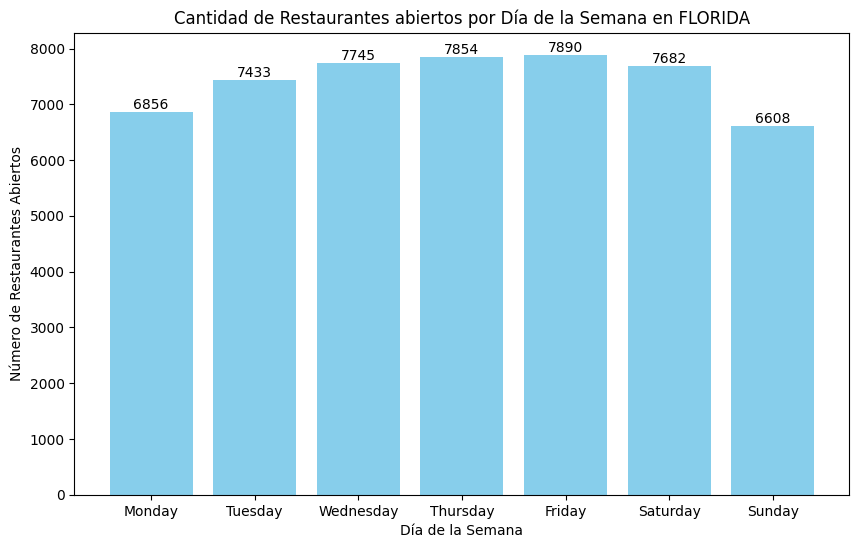

In [90]:
# Reemplazar horarios '0:0-0:0' por NaN
df_busshs.replace({'0:0-0:0': np.nan}, inplace=True)
# Función para procesar la columna 'hours' y crear nuevas columnas por día
def process_hours(row, idx):
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    # Verificar si row es un diccionario
    if isinstance(row, str):
        try:
            hours_dict = eval(row)  # Convertir la cadena a un diccionario
        except Exception:
            return  # Si no se puede convertir, salir
    else:
        return  # Si no es válido, salir
    for day in days:
        if day in hours_dict:
            open_time, close_time = hours_dict[day].split('-')
            df_busshs.loc[idx, f'{day}_open'] = open_time
            df_busshs.loc[idx, f'{day}_close'] = close_time
        else:
            df_busshs.loc[idx, f'{day}_open'] = np.nan
            df_busshs.loc[idx, f'{day}_close'] = np.nan

# Aplicar la función a la columna 'hours'
for idx, row in df_busshs['hours'].items():  # Cambiado a items()
    process_hours(row, idx)
# Contar cuántos negocios están abiertos al menos un día de la semana
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
open_counts = {day: df_busshs[f'{day}_open'].notna().sum() for day in days}

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(open_counts.keys(), open_counts.values(), color='skyblue')
# Agregar etiquetas y título
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Restaurantes Abiertos')
plt.title('Cantidad de Restaurantes abiertos por Día de la Semana en FLORIDA')
# Mostrar la cantidad de negocios encima de cada barra
for day, count in open_counts.items():
    plt.text(day, count, str(count), ha='center', va='bottom')
# Mostrar el gráfico
plt.show()

In [102]:
df_busshs.head()
df_busshs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18897 entries, 14 to 150319
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 9187 non-null   object 
 1   name                        9187 non-null   object 
 2   address                     9109 non-null   object 
 3   city                        9187 non-null   object 
 4   state                       9187 non-null   object 
 5   postal_code                 9185 non-null   object 
 6   latitude                    9187 non-null   float64
 7   longitude                   9187 non-null   float64
 8   stars                       9187 non-null   float64
 9   review_count                9187 non-null   float64
 10  is_open                     9187 non-null   float64
 11  categories                  9187 non-null   object 
 12  hours                       7933 non-null   object 
 13  BusinessAcceptsCreditCards  1421 n

C:\Users\Esteban\AppData\Local\Temp\ipykernel_9332\1878549674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_busshs['Monday_open'] = pd.to_datetime(df_busshs['Monday_open'], format='%H:%M', errors='coerce')
C:\Users\Esteban\AppData\Local\Temp\ipykernel_9332\1878549674.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_busshs['Monday_close'] = pd.to_datetime(df_busshs['Monday_close'], format='%H:%M', errors='coerce')
C:\Users\Esteban\AppData\Local\Temp\ipykernel_9332\1878549674.py:4: SettingWithC

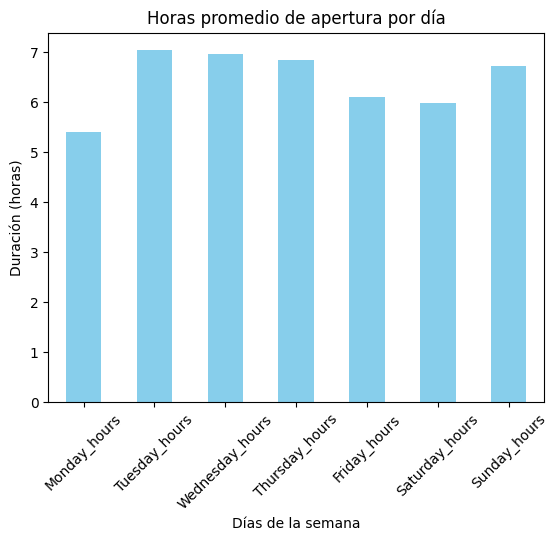

In [91]:
# Convierte las columnas de apertura y cierre a formato de tiempo
df_busshs['Monday_open'] = pd.to_datetime(df_busshs['Monday_open'], format='%H:%M', errors='coerce')
df_busshs['Monday_close'] = pd.to_datetime(df_busshs['Monday_close'], format='%H:%M', errors='coerce')
df_busshs['Tuesday_open'] = pd.to_datetime(df_busshs['Tuesday_open'], format='%H:%M', errors='coerce')
df_busshs['Tuesday_close'] = pd.to_datetime(df_busshs['Tuesday_close'], format='%H:%M', errors='coerce')
df_busshs['Wednesday_open'] = pd.to_datetime(df_busshs['Wednesday_open'], format='%H:%M', errors='coerce')
df_busshs['Wednesday_close'] = pd.to_datetime(df_busshs['Wednesday_close'], format='%H:%M', errors='coerce')
df_busshs['Thursday_open'] = pd.to_datetime(df_busshs['Thursday_open'], format='%H:%M', errors='coerce')
df_busshs['Thursday_close'] = pd.to_datetime(df_busshs['Thursday_close'], format='%H:%M', errors='coerce')
df_busshs['Friday_open'] = pd.to_datetime(df_busshs['Friday_open'], format='%H:%M', errors='coerce')
df_busshs['Friday_close'] = pd.to_datetime(df_busshs['Friday_close'], format='%H:%M', errors='coerce')
df_busshs['Saturday_open'] = pd.to_datetime(df_busshs['Saturday_open'], format='%H:%M', errors='coerce')
df_busshs['Saturday_close'] = pd.to_datetime(df_busshs['Saturday_close'], format='%H:%M', errors='coerce')
df_busshs['Sunday_open'] = pd.to_datetime(df_busshs['Sunday_open'], format='%H:%M', errors='coerce')
df_busshs['Sunday_close'] = pd.to_datetime(df_busshs['Sunday_close'], format='%H:%M', errors='coerce')

df_busshs['Monday_hours'] = (df_busshs['Monday_close'] - df_busshs['Monday_open']).dt.total_seconds() / 3600  # En horas
df_busshs['Tuesday_hours'] = (df_busshs['Tuesday_close'] - df_busshs['Tuesday_open']).dt.total_seconds() / 3600
df_busshs['Wednesday_hours'] = (df_busshs['Wednesday_close'] - df_busshs['Wednesday_open']).dt.total_seconds() / 3600
df_busshs['Thursday_hours'] = (df_busshs['Thursday_close'] - df_busshs['Thursday_open']).dt.total_seconds() / 3600
df_busshs['Friday_hours'] = (df_busshs['Friday_close'] - df_busshs['Friday_open']).dt.total_seconds() / 3600
df_busshs['Saturday_hours'] = (df_busshs['Saturday_close'] - df_busshs['Saturday_open']).dt.total_seconds() / 3600
df_busshs['Sunday_hours'] = (df_busshs['Sunday_close'] - df_busshs['Sunday_open']).dt.total_seconds() / 3600

# Convertir las horas de apertura y cierre a tipo datetime
for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
    df_busshs[f'{day}_open'] = pd.to_datetime(df_busshs[f'{day}_open'], format='%H:%M')
    df_busshs[f'{day}_close'] = pd.to_datetime(df_busshs[f'{day}_close'], format='%H:%M')

# Calcular las horas de apertura para cada día
for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
    # Asegurarse de que los tiempos son del tipo adecuado
    df_busshs[f'{day}_hours'] = (df_busshs[f'{day}_close'] - df_busshs[f'{day}_open']).dt.total_seconds() / 3600  # En horas

# Crear un nuevo DataFrame solo con las horas
df_hours = df_busshs[[f'{day}_hours' for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]]
df_hours.columns = ['Monday_hours', 'Tuesday_hours', 'Wednesday_hours', 'Thursday_hours', 'Friday_hours', 'Saturday_hours', 'Sunday_hours']
# Visualización de horas promedio

# Calcular las horas promedio
average_hours = df_hours.mean()

# Crear gráfico de barras
average_hours.plot(kind='bar', color='skyblue')
plt.title('Horas promedio de apertura por día')
plt.ylabel('Duración (horas)')
plt.xlabel('Días de la semana')
plt.xticks(rotation=45)
plt.show()

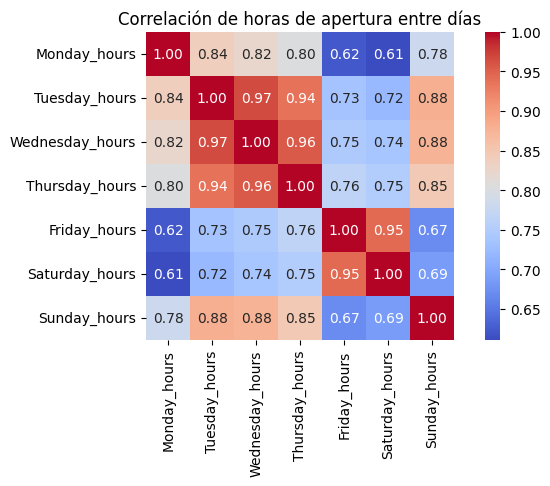

In [93]:
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.heatmap(df_hours.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlación de horas de apertura entre días')
plt.show()

En el siguiente grafico de correlacion, analizamos que los dias de martes a jueves, se podria decir que hay bastantes negocios que abren a la misma hora, y que los negocios mas tempranos abren los viernes y sabados debido a que estos dias hay mas concurrencias.  

In [98]:
df_busshs.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,hours,BusinessAcceptsCreditCards,BikeParking,RestaurantsTakeOut,RestaurantsDelivery,OutdoorSeating,Monday_open,Monday_close,Tuesday_open,Tuesday_close,Wednesday_open,Wednesday_close,Thursday_open,Thursday_close,Friday_open,Friday_close,Saturday_open,Saturday_close,Sunday_open,Sunday_close,Monday_hours,Tuesday_hours,Wednesday_hours,Thursday_hours,Friday_hours,Saturday_hours,Sunday_hours
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100.0,0.0,"Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0', 'Wednesday': '10:0-20:0', 'Thursday': '10:0-20:0', 'Friday': '10:0-20:0', 'Saturday': '10:0-20:0'}",False,True,NaN,NaN,NaN,1900-01-01 10:00:00,1900-01-01 18:00:00,1900-01-01 10:00:00,1900-01-01 20:00:00,1900-01-01 10:00:00,1900-01-01 20:00:00,1900-01-01 10:00:00,1900-01-01 20:00:00,1900-01-01 10:00:00,1900-01-01 20:00:00,1900-01-01 10:00:00,1900-01-01 20:00:00,NaT,NaT,8.0,10.0,10.0,10.0,10.0,10.0,NaN
53,cVBxfMC4lp3DnocjYA3FHQ,Paws The Cat Cafe,10588 109 Street,Edmonton,FL,T5H 3B2,53.549633,-113.508780,5.0,20.0,0.0,"Coffee & Tea, Cafes, Pets, Restaurants, Pet Adoption, Food","{'Monday': '0:0-0:0', 'Tuesday': '10:0-21:0', 'Wednesday': '10:0-21:0', 'Thursday': '10:0-21:0', 'Friday': '10:0-20:0', 'Saturday': '10:0-18:0', 'Sunday': '10:0-18:0'}",True,True,True,False,False,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 10:00:00,1900-01-01 21:00:00,1900-01-01 10:00:00,1900-01-01 21:00:00,1900-01-01 10:00:00,1900-01-01 21:00:00,1900-01-01 10:00:00,1900-01-01 20:00:00,1900-01-01 10:00:00,1900-01-01 18:00:00,1900-01-01 10:00:00,1900-01-01 18:00:00,0.0,11.0,11.0,11.0,10.0,8.0,8.0
61,seKihQKpGGnCeLuELRQPSQ,Twin Peaks,6880 E 82nd St,Indianapolis,FL,46250,39.906295,-86.047463,3.5,257.0,1.0,"Sports Bars, American (New), American (Traditional), Nightlife, Bars, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', 'Wednesday': '11:0-0:0', 'Thursday': '11:0-22:0', 'Friday': '11:0-19:0', 'Saturday': '11:0-1:0', 'Sunday': '11:0-0:0'}",True,NaN,True,False,True,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 11:00:00,1900-01-01 00:00:00,1900-01-01 11:00:00,1900-01-01 00:00:00,1900-01-01 11:00:00,1900-01-01 22:00:00,1900-01-01 11:00:00,1900-01-01 19:00:00,1900-01-01 11:00:00,1900-01-01 01:00:00,1900-01-01 11:00:00,1900-01-01 00:00:00,0.0,-11.0,-11.0,11.0,8.0,-10.0,-11.0
62,L_TT0BFmFwORAMaA83K54A,Village Tap Room,838 Broad Ripple Ave,Indianapolis,FL,46220,39.869911,-86.143577,2.5,23.0,0.0,"Gastropubs, Cocktail Bars, Beer Bar, Bars, Restaurants, Nightlife",NaN,NaN,True,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,FL,19104,39.954573,-75.194894,3.0,56.0,1.0,"Restaurants, Automotive, Delis, Gas Stations, Food, Coffee & Tea, Sandwiches, Convenience Stores","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'Wednesday': '0:0-0:0', 'Thursday': '0:0-0:0', 'Friday': '0:0-0:0', 'Saturday': '0:0-0:0', 'Sunday': '0:0-0:0'}",False,False,False,False,False,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


De este analisis se puede ver que de 9187 RESTAURANTES que se encuentran en el ESTADO DE FLORIDA, 2771, son de comidas AMERICANAS.
Estos abren todos los dias, pero los dias de martes a jueves, los mismos tienen mayor cantidad de horas de apertura. a menor diferencia los dias viernes y sabados.

In [103]:
df_busnew1 = df_busshs.reset_index(drop=True)  # Restablece el índice actual
df_busnew1['bus_id'] = df_busnew1.index  # Asigna el índice actual a la nueva columna 'bus_id'
df_busnew1.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,hours,BusinessAcceptsCreditCards,BikeParking,RestaurantsTakeOut,RestaurantsDelivery,OutdoorSeating,Monday_open,Monday_close,Tuesday_open,Tuesday_close,Wednesday_open,Wednesday_close,Thursday_open,Thursday_close,Friday_open,Friday_close,Saturday_open,Saturday_close,Sunday_open,Sunday_close,Monday_hours,Tuesday_hours,Wednesday_hours,Thursday_hours,Friday_hours,Saturday_hours,Sunday_hours,bus_id
0,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100.0,0.0,"Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0', 'Wednesday': '10:0-20:0', 'Thursday': '10:0-20:0', 'Friday': '10:0-20:0', 'Saturday': '10:0-20:0'}",False,True,NaN,NaN,NaN,1900-01-01 10:00:00,1900-01-01 18:00:00,1900-01-01 10:00:00,1900-01-01 20:00:00,1900-01-01 10:00:00,1900-01-01 20:00:00,1900-01-01 10:00:00,1900-01-01 20:00:00,1900-01-01 10:00:00,1900-01-01 20:00:00,1900-01-01 10:00:00,1900-01-01 20:00:00,NaT,NaT,8.0,10.0,10.0,10.0,10.0,10.0,NaN,0
1,cVBxfMC4lp3DnocjYA3FHQ,Paws The Cat Cafe,10588 109 Street,Edmonton,FL,T5H 3B2,53.549633,-113.508780,5.0,20.0,0.0,"Coffee & Tea, Cafes, Pets, Restaurants, Pet Adoption, Food","{'Monday': '0:0-0:0', 'Tuesday': '10:0-21:0', 'Wednesday': '10:0-21:0', 'Thursday': '10:0-21:0', 'Friday': '10:0-20:0', 'Saturday': '10:0-18:0', 'Sunday': '10:0-18:0'}",True,True,True,False,False,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 10:00:00,1900-01-01 21:00:00,1900-01-01 10:00:00,1900-01-01 21:00:00,1900-01-01 10:00:00,1900-01-01 21:00:00,1900-01-01 10:00:00,1900-01-01 20:00:00,1900-01-01 10:00:00,1900-01-01 18:00:00,1900-01-01 10:00:00,1900-01-01 18:00:00,0.0,11.0,11.0,11.0,10.0,8.0,8.0,1
2,seKihQKpGGnCeLuELRQPSQ,Twin Peaks,6880 E 82nd St,Indianapolis,FL,46250,39.906295,-86.047463,3.5,257.0,1.0,"Sports Bars, American (New), American (Traditional), Nightlife, Bars, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', 'Wednesday': '11:0-0:0', 'Thursday': '11:0-22:0', 'Friday': '11:0-19:0', 'Saturday': '11:0-1:0', 'Sunday': '11:0-0:0'}",True,NaN,True,False,True,0:0,0:0,11:0,0:0,11:0,0:0,11:0,22:0,11:0,19:0,11:0,1:0,11:0,0:0,0.0,-11.0,-11.0,11.0,8.0,-10.0,-11.0,2
3,L_TT0BFmFwORAMaA83K54A,Village Tap Room,838 Broad Ripple Ave,Indianapolis,FL,46220,39.869911,-86.143577,2.5,23.0,0.0,"Gastropubs, Cocktail Bars, Beer Bar, Bars, Restaurants, Nightlife",NaN,NaN,True,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,FL,19104,39.954573,-75.194894,3.0,56.0,1.0,"Restaurants, Automotive, Delis, Gas Stations, Food, Coffee & Tea, Sandwiches, Convenience Stores","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'Wednesday': '0:0-0:0', 'Thursday': '0:0-0:0', 'Friday': '0:0-0:0', 'Saturday': '0:0-0:0', 'Sunday': '0:0-0:0'}",False,False,False,False,False,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [97]:
df_busshs.to_csv('../PROYFINAL1/dfbusinessYELP3_FL_listo.csv')